**Install PyCaret**

In [1]:
#Complied using a local run-time with an RTX 4080
!nvidia-smi

Wed Nov 29 21:45:28 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   37C    P0              33W / 320W |   2852MiB / 16376MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
#Uncomment if not using a local run-time.

#!pip install pycaret
#!pip install pycaret[full]
#!pip install pycaret[analysis]
#!pip install pycaret[models]
#!pip install pycaret[tuner]
#!pip install pycaret[mlops]
#!pip install pycaret[parallel]
#!pip install pycaret[test]

**Check PyCaret verison**

In [3]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

Load Data

In [4]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/yousef022/AI-Final-Project-Dataset/master/parkinsons_updrs.csv'
data = pd.read_csv(url)
data = data.drop(columns=['subject#', 'motor_UPDRS'], axis = 1 )
data

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


**Setup PyCaret**

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


**Compare models**

In [6]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0656,3.4868,1.8560,0.9691,0.1002,0.0537,0.0550
rf,Random Forest Regressor,0.9955,4.0065,1.9863,0.9646,0.0969,0.0486,0.2820
xgboost,Extreme Gradient Boosting,1.4133,4.8247,2.1919,0.9572,0.1056,0.0642,0.0350
catboost,CatBoost Regressor,1.5544,4.8993,2.2106,0.9566,0.1089,0.0721,0.4600
lightgbm,Light Gradient Boosting Machine,1.4463,5.0631,2.2369,0.9551,0.1054,0.0660,0.1050
dt,Decision Tree Regressor,1.0518,12.0844,3.4357,0.8933,0.1482,0.0478,0.0080
gbr,Gradient Boosting Regressor,3.9042,25.0879,5.0037,0.7780,0.1999,0.1668,0.1600
knn,K Neighbors Regressor,6.1178,65.4495,8.0813,0.4211,0.3002,0.2556,0.0080
ada,AdaBoost Regressor,7.2577,69.6266,8.3406,0.3829,0.3225,0.3178,0.0440
lr,Linear Regression,8.0521,94.6137,9.7232,0.1619,0.3638,0.3517,0.2170


**Evaluate the model**

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Prediction**

In [8]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9957,3.0434,1.7445,0.9740,0.0875,0.0468


In [9]:
# show predictions df
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,23.61585
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,28.75405
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,24.31152
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.81815
5068,56,1,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.11202


In [10]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [11]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,35.810001
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


**Save Model**

In [12]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [13]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Yousef\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

**Re-Setup**

In [14]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [15]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,sex,test_time,Jitter(%),Jitter(Abs),JitterRAP,JitterPPQ5,JitterDDP,Shimmer,Shimmer(dB),ShimmerAPQ3,ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE
2837,73.0,0.0,88.788002,0.00503,0.000046,0.00264,0.00309,0.00793,0.03296,0.274,0.01807,0.01937,0.02640,0.05422,0.011941,21.292000,0.45239,0.69349,0.23968
1138,73.0,1.0,120.550003,0.00346,0.000019,0.00189,0.00188,0.00568,0.02042,0.173,0.01105,0.01173,0.01560,0.03316,0.008148,22.187000,0.52245,0.67575,0.15161
2017,65.0,0.0,54.469002,0.00335,0.000020,0.00169,0.00159,0.00508,0.02906,0.268,0.01501,0.01572,0.01856,0.04504,0.021429,25.204000,0.44169,0.67883,0.14879
684,75.0,0.0,91.397003,0.00398,0.000032,0.00171,0.00198,0.00512,0.04390,0.394,0.02585,0.02561,0.03255,0.07755,0.018117,20.502001,0.64019,0.60485,0.18814
3783,74.0,1.0,6.366000,0.00878,0.000049,0.00503,0.00434,0.01510,0.03784,0.302,0.01761,0.01972,0.02955,0.05283,0.018895,18.750000,0.67110,0.72977,0.20523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,67.0,0.0,133.770004,0.00574,0.000033,0.00268,0.00235,0.00805,0.02029,0.207,0.00916,0.01075,0.01760,0.02748,0.036406,21.254000,0.48050,0.61930,0.25536
4060,49.0,0.0,11.394000,0.00375,0.000036,0.00128,0.00172,0.00385,0.02078,0.183,0.00803,0.01339,0.02426,0.02409,0.008705,24.089001,0.62810,0.73603,0.16133
1346,68.0,0.0,168.350006,0.00684,0.000045,0.00280,0.00341,0.00840,0.02097,0.381,0.00925,0.01072,0.01665,0.02774,0.036896,21.507000,0.58004,0.70404,0.29972
3454,76.0,0.0,3.395800,0.00646,0.000065,0.00319,0.00356,0.00958,0.02361,0.206,0.01100,0.01440,0.02246,0.03301,0.045684,19.867001,0.66059,0.56084,0.22049


In [16]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


**After pre-processsing**

In [17]:
# init setup with normalize = True
s = setup(data, target = 'total_UPDRS', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


<AxesSubplot: >

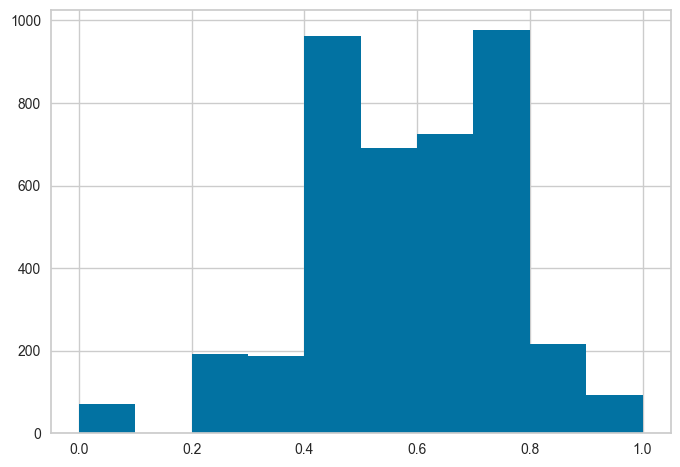

In [18]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

<AxesSubplot: >

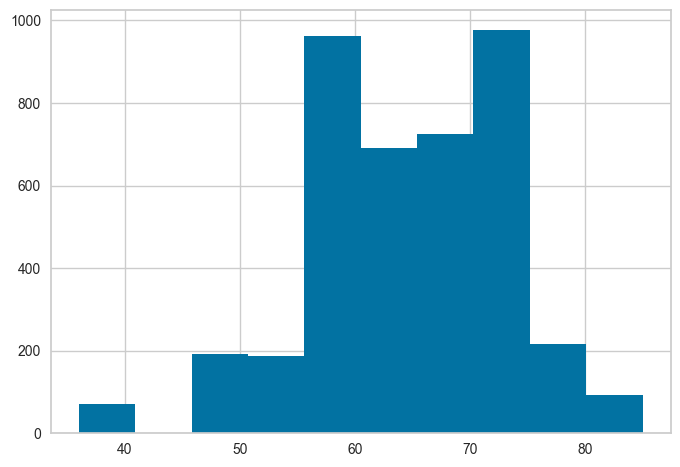

In [19]:
get_config('X_train')['age'].hist()

**Check for best model again**

In [20]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0415,3.3636,1.8246,0.9702,0.0996,0.0528,0.0530
rf,Random Forest Regressor,1.0007,4.0244,1.9914,0.9644,0.0976,0.0489,0.2520
xgboost,Extreme Gradient Boosting,1.4133,4.8247,2.1919,0.9572,0.1056,0.0642,0.0390
catboost,CatBoost Regressor,1.5545,4.8997,2.2107,0.9566,0.1089,0.0721,0.4320
lightgbm,Light Gradient Boosting Machine,1.4211,4.9022,2.2024,0.9566,0.1044,0.0652,0.1200
dt,Decision Tree Regressor,1.0332,11.5265,3.3608,0.8983,0.1436,0.0457,0.0090
gbr,Gradient Boosting Regressor,3.9247,25.2832,5.0226,0.7763,0.2009,0.1679,0.1590
knn,K Neighbors Regressor,3.7889,38.9742,6.2370,0.6529,0.2448,0.1731,0.0080
ada,AdaBoost Regressor,7.2518,69.1223,8.3109,0.3870,0.3225,0.3185,0.0440
ridge,Ridge Regression,8.0417,94.4311,9.7127,0.1639,0.3638,0.3518,0.0040


In [21]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [22]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'lr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0415,3.3636,1.8246,0.9702,0.0996,0.0528,0.0530
rf,Random Forest Regressor,1.0007,4.0244,1.9914,0.9644,0.0976,0.0489,0.2460
xgboost,Extreme Gradient Boosting,1.4133,4.8247,2.1919,0.9572,0.1056,0.0642,0.0480
lightgbm,Light Gradient Boosting Machine,1.4211,4.9022,2.2024,0.9566,0.1044,0.0652,0.1220
dt,Decision Tree Regressor,1.0332,11.5265,3.3608,0.8983,0.1436,0.0457,0.0090
gbr,Gradient Boosting Regressor,3.9247,25.2832,5.0226,0.7763,0.2009,0.1679,0.1570
lr,Linear Regression,8.0534,94.6860,9.7267,0.1613,0.3638,0.3517,0.0040


In [23]:
compare_tree_models

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [24]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0415,3.3636,1.8246,0.9702,0.0996,0.0528,0.053
rf,Random Forest Regressor,1.0007,4.0244,1.9914,0.9644,0.0976,0.0489,0.246
xgboost,Extreme Gradient Boosting,1.4133,4.8247,2.1919,0.9572,0.1056,0.0642,0.048
lightgbm,Light Gradient Boosting Machine,1.4211,4.9022,2.2024,0.9566,0.1044,0.0652,0.122
dt,Decision Tree Regressor,1.0332,11.5265,3.3608,0.8983,0.1436,0.0457,0.009
gbr,Gradient Boosting Regressor,3.9247,25.2832,5.0226,0.7763,0.2009,0.1679,0.157
lr,Linear Regression,8.0534,94.6860,9.7267,0.1613,0.3638,0.3517,0.004


In [25]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.0007,4.0244,1.9914,0.9644,0.0976,0.0489,0.2520
dt,Decision Tree Regressor,1.0332,11.5265,3.3608,0.8983,0.1436,0.0457,0.0090
et,Extra Trees Regressor,1.0415,3.3636,1.8246,0.9702,0.0996,0.0528,0.0510
xgboost,Extreme Gradient Boosting,1.4133,4.8247,2.1919,0.9572,0.1056,0.0642,0.0480
lightgbm,Light Gradient Boosting Machine,1.4211,4.9022,2.2024,0.9566,0.1044,0.0652,0.1220
catboost,CatBoost Regressor,1.5545,4.8997,2.2107,0.9566,0.1089,0.0721,0.4120
knn,K Neighbors Regressor,3.7889,38.9742,6.2370,0.6529,0.2448,0.1731,0.0110
gbr,Gradient Boosting Regressor,3.9247,25.2832,5.0226,0.7763,0.2009,0.1679,0.1610
ada,AdaBoost Regressor,7.2518,69.1223,8.3109,0.3870,0.3225,0.3185,0.0470
huber,Huber Regressor,7.9389,95.8301,9.7843,0.1515,0.3599,0.3378,0.0090


In [26]:
# list of top 3 models by MAE
best_mae_models_top3

[RandomForestRegressor(n_jobs=-1, random_state=123),
 DecisionTreeRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

**Create the Model**

In [27]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
# train random forest with default fold=10
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0887,3.9662,1.9915,0.9646,0.1035,0.0544
1,0.9579,3.5116,1.8739,0.9649,0.0870,0.0456
2,0.8259,2.4565,1.5673,0.9772,0.0923,0.0433
3,0.9946,4.6919,2.1661,0.9601,0.0894,0.0442
4,0.9523,3.1384,1.7716,0.9739,0.0793,0.0413
5,1.0555,5.1365,2.2664,0.9596,0.1233,0.0606
6,1.0506,5.5193,2.3493,0.9517,0.1083,0.0489
7,1.0179,3.7342,1.9324,0.9647,0.0943,0.0492
8,0.9968,3.1256,1.7679,0.9730,0.0874,0.0451


In [29]:
rf_results = pull()
print(type(rf_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0887,3.9662,1.9915,0.9646,0.1035,0.0544
1,0.9579,3.5116,1.8739,0.9649,0.0870,0.0456
2,0.8259,2.4565,1.5673,0.9772,0.0923,0.0433
3,0.9946,4.6919,2.1661,0.9601,0.0894,0.0442
4,0.9523,3.1384,1.7716,0.9739,0.0793,0.0413
5,1.0555,5.1365,2.2664,0.9596,0.1233,0.0606
6,1.0506,5.5193,2.3493,0.9517,0.1083,0.0489
7,1.0179,3.7342,1.9324,0.9647,0.0943,0.0492
8,0.9968,3.1256,1.7679,0.9730,0.0874,0.0451


In [30]:
# train random forest with fold=0
rf = create_model('rf', fold=0)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0887,3.9662,1.9915,0.9646,0.1035,0.0544
1,0.9579,3.5116,1.8739,0.9649,0.0870,0.0456
2,0.8259,2.4565,1.5673,0.9772,0.0923,0.0433
3,0.9946,4.6919,2.1661,0.9601,0.0894,0.0442
4,0.9523,3.1384,1.7716,0.9739,0.0793,0.0413
5,1.0555,5.1365,2.2664,0.9596,0.1233,0.0606
6,1.0506,5.5193,2.3493,0.9517,0.1083,0.0489
7,1.0179,3.7342,1.9324,0.9647,0.0943,0.0492
8,0.9968,3.1256,1.7679,0.9730,0.0874,0.0451


In [31]:
# train random forest with specific model parameters
create_model('rf', n_jobs=-1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0887,3.9662,1.9915,0.9646,0.1035,0.0544
1,0.9579,3.5116,1.8739,0.9649,0.0870,0.0456
2,0.8259,2.4565,1.5673,0.9772,0.0923,0.0433
3,0.9946,4.6919,2.1661,0.9601,0.0894,0.0442
4,0.9523,3.1384,1.7716,0.9739,0.0793,0.0413
5,1.0555,5.1365,2.2664,0.9596,0.1233,0.0606
6,1.0506,5.5193,2.3493,0.9517,0.1083,0.0489
7,1.0179,3.7342,1.9324,0.9647,0.0943,0.0492
8,0.9968,3.1256,1.7679,0.9730,0.0874,0.0451


RandomForestRegressor(n_jobs=-1, random_state=123)

In [32]:
# train rf and return train score as well alongwith CV
create_model('rf', return_train_score=True)

RandomForestRegressor(n_jobs=-1, random_state=123)

**Tune Model**

In [33]:
# train a rf model with default params
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0887,3.9662,1.9915,0.9646,0.1035,0.0544
1,0.9579,3.5116,1.8739,0.9649,0.0870,0.0456
2,0.8259,2.4565,1.5673,0.9772,0.0923,0.0433
3,0.9946,4.6919,2.1661,0.9601,0.0894,0.0442
4,0.9523,3.1384,1.7716,0.9739,0.0793,0.0413
5,1.0555,5.1365,2.2664,0.9596,0.1233,0.0606
6,1.0506,5.5193,2.3493,0.9517,0.1083,0.0489
7,1.0179,3.7342,1.9324,0.9647,0.0943,0.0492
8,0.9968,3.1256,1.7679,0.9730,0.0874,0.0451


In [34]:
# tune hyperparameters of rf
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2513,9.7065,3.1155,0.9133,0.1412,0.1017
1,2.1615,8.2317,2.8691,0.9178,0.1308,0.0997
2,2.0688,7.8913,2.8091,0.9268,0.1373,0.0966
3,2.2650,10.5346,3.2457,0.9103,0.1342,0.0970
4,2.0994,8.0313,2.8340,0.9331,0.1216,0.0903
5,2.2815,11.1496,3.3391,0.9124,0.1602,0.1133
6,2.2132,10.7569,3.2798,0.9058,0.1411,0.0955
7,2.2243,9.0709,3.0118,0.9143,0.1409,0.1028
8,2.3196,10.0304,3.1671,0.9132,0.1347,0.0992


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
rf

RandomForestRegressor(n_jobs=-1, random_state=123)

In [36]:
# define tuning grid
rf_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# tune model with custom grid and metric = MAE
tuned_rf = tune_model(rf, custom_grid = rf_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8781,8.0630,2.8395,0.9280,0.1173,0.0423
1,0.9893,9.4798,3.0789,0.9053,0.1217,0.0448
2,0.8102,6.7127,2.5909,0.9377,0.1113,0.0354
3,1.0453,13.4335,3.6652,0.8857,0.1293,0.0420
4,1.1005,11.4371,3.3819,0.9047,0.1174,0.0419
5,1.1030,11.8527,3.4428,0.9069,0.1489,0.0512
6,0.9596,10.3097,3.2109,0.9097,0.1559,0.0474
7,0.8026,8.2189,2.8669,0.9223,0.1300,0.0364
8,1.0371,9.5894,3.0967,0.9170,0.1326,0.0421


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2513,9.7065,3.1155,0.9133,0.1412,0.1017
1,2.1615,8.2317,2.8691,0.9178,0.1308,0.0997
2,2.0688,7.8913,2.8091,0.9268,0.1373,0.0966
3,2.2650,10.5346,3.2457,0.9103,0.1342,0.0970
4,2.0994,8.0313,2.8340,0.9331,0.1216,0.0903
5,2.2815,11.1496,3.3391,0.9124,0.1602,0.1133
6,2.2132,10.7569,3.2798,0.9058,0.1411,0.0955
7,2.2243,9.0709,3.0118,0.9143,0.1409,0.1028
8,2.3196,10.0304,3.1671,0.9132,0.1347,0.0992


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
# model object
tuned_rf

RandomForestRegressor(n_jobs=-1, random_state=123)

In [39]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'sex',
                                                                          'test_time',
                                                                          'Jitter(%)',
                                                                          'Jitter(Abs)',
                                                                          'Jitter:RAP',
                                                                          'Jitter:PPQ5',
                                                                          'Jitter:DDP',
                                                                          'Shimmer',
                                                                          'Shimmer(dB)',
                                                                          'Shimmer:APQ3',
                                                                          'Shimmer:APQ5',
                                                                          'Shimmer:APQ11',
                                                                          'Shimmer:DDA'...
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                

In [40]:
# tune rf using optuna
tuned_rf = tune_model(rf, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6578,13.4215,3.6635,0.8802,0.1554,0.1164
1,2.3987,10.3292,3.2139,0.8969,0.1454,0.1116
2,2.4339,10.3024,3.2097,0.9044,0.1488,0.1114
3,2.6334,13.6866,3.6995,0.8835,0.1513,0.1118
4,2.4819,10.7245,3.2748,0.9106,0.1389,0.1064
5,2.5763,13.3421,3.6527,0.8951,0.1744,0.1283
6,2.5011,12.8012,3.5779,0.8879,0.1515,0.1077
7,2.4731,12.2049,3.4936,0.8846,0.1636,0.1173
8,2.5634,12.2918,3.5060,0.8937,0.1445,0.1075


[I 2023-11-29 21:51:54,362] Searching the best hyperparameters using 4112 samples...
[I 2023-11-29 21:54:22,397] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Ensemble Model**

In [41]:
# ensemble with bagging
ensemble_model(rf, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6489,6.5142,2.5523,0.9418,0.1227,0.0773
1,1.4628,5.5861,2.3635,0.9442,0.1157,0.0717
2,1.2671,3.9433,1.9858,0.9634,0.1088,0.0624
3,1.5288,6.6628,2.5812,0.9433,0.1079,0.0665
4,1.3534,4.3669,2.0897,0.9636,0.0940,0.0590
5,1.4973,6.5659,2.5624,0.9484,0.1377,0.0805
6,1.5114,6.5483,2.5590,0.9427,0.1171,0.0683
7,1.4521,5.5845,2.3632,0.9472,0.1170,0.0702
8,1.5659,5.5108,2.3475,0.9523,0.1100,0.0700


BaggingRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                 random_state=123)

In [42]:
# ensemble with boosting
ensemble_model(rf, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2178,4.0672,2.0167,0.9637,0.0934,0.0547
1,0.9900,3.1248,1.7677,0.9688,0.0796,0.0457
2,0.9347,2.5454,1.5954,0.9764,0.0885,0.0452
3,1.0741,3.9575,1.9894,0.9663,0.0795,0.0443
4,1.1096,3.0125,1.7357,0.9749,0.0747,0.0467
5,1.0842,4.1509,2.0374,0.9674,0.1132,0.0591
6,0.9681,2.8117,1.6768,0.9754,0.0890,0.0445
7,0.9835,2.6059,1.6143,0.9754,0.0830,0.0454
8,1.0903,2.8158,1.6780,0.9756,0.0767,0.0467


AdaBoostRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                  n_estimators=10, random_state=123)

**Blend Models**

In [43]:
# top 3 models based on mae
best_mae_models_top3

[RandomForestRegressor(n_jobs=-1, random_state=123),
 DecisionTreeRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [44]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9510,3.3489,1.8300,0.9701,0.0964,0.0480
1,0.8612,3.6268,1.9044,0.9638,0.0870,0.0421
2,0.7414,2.3529,1.5339,0.9782,0.0812,0.0361
3,0.9740,4.9645,2.2281,0.9578,0.0928,0.0434
4,0.9762,3.8947,1.9735,0.9675,0.0851,0.0424
5,1.0268,4.9087,2.2156,0.9614,0.1175,0.0563
6,0.9623,5.3602,2.3152,0.9531,0.1100,0.0459
7,0.8603,3.9657,1.9914,0.9625,0.0952,0.0428
8,0.9358,3.1442,1.7732,0.9728,0.0874,0.0425


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Decision Tree Regressor',
                             DecisionTreeRegressor(random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

**Stack Models**

In [45]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9515,2.3060,1.5186,0.9794,0.0883,0.0469
1,0.8778,2.5165,1.5863,0.9749,0.0770,0.0418
2,0.8749,2.0794,1.4420,0.9807,0.0867,0.0436
3,1.0266,3.2682,1.8078,0.9722,0.0841,0.0461
4,0.9334,2.1924,1.4807,0.9817,0.0663,0.0390
5,1.0563,3.4406,1.8549,0.9730,0.1113,0.0581
6,0.9774,3.4128,1.8474,0.9701,0.0933,0.0446
7,1.0307,3.4974,1.8701,0.9669,0.0951,0.0488
8,0.9490,2.0197,1.4212,0.9825,0.0717,0.0411


StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

**Re-evaluate Model**

In [46]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Interpret Model**

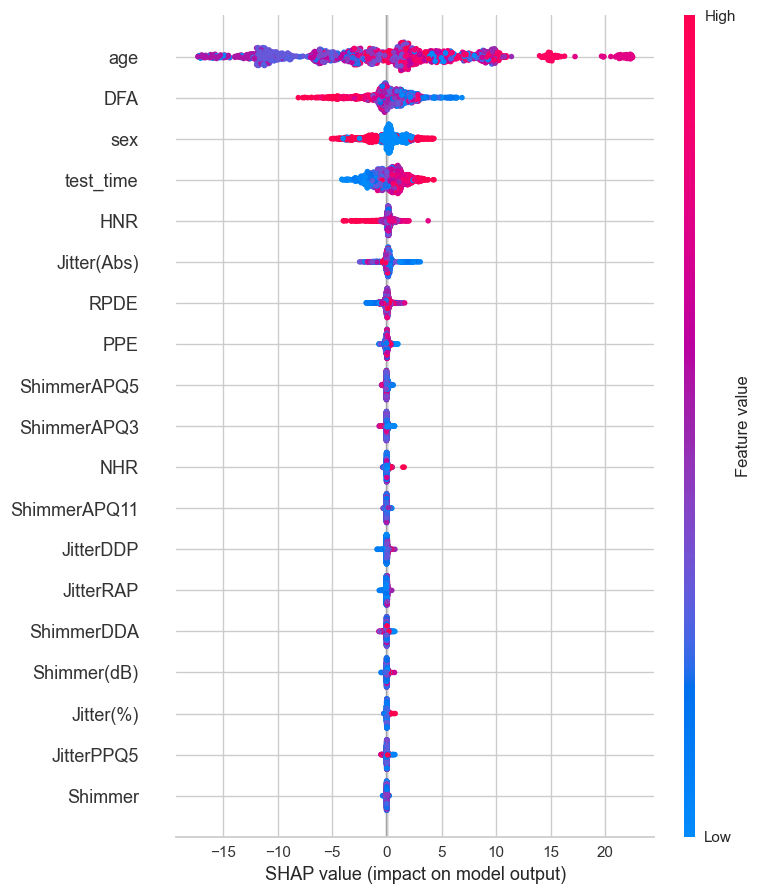

In [47]:
# interpret summary model
interpret_model(rf, plot = 'summary')

In [48]:
# reason plot for test set observation 1
interpret_model(rf, plot = 'reason', observation = 1)

**Get Leaderboard**

In [49]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['age', 'sex', 'te...",8.0534,94.6860,9.7267,0.1613,0.3638,0.3517
1,Lasso Regression,"(TransformerWrapper(include=['age', 'sex', 'te...",8.5678,113.3682,10.6421,-0.0035,0.4048,0.3966
2,Ridge Regression,"(TransformerWrapper(include=['age', 'sex', 'te...",8.0417,94.4311,9.7127,0.1639,0.3638,0.3518
3,Elastic Net,"(TransformerWrapper(include=['age', 'sex', 'te...",8.5643,113.1953,10.6340,-0.0020,0.4045,0.3964
4,Least Angle Regression,"(TransformerWrapper(include=['age', 'sex', 'te...",8.0548,94.6930,9.7270,0.1613,0.3638,0.3518
...,...,...,...,...,...,...,...,...
59,Random Forest Regressor,"(TransformerWrapper(include=['age', 'sex', 'te...",1.0007,4.0244,1.9914,0.9644,0.0976,0.0489
60,Bagging Regressor,"(TransformerWrapper(include=['age', 'sex', 'te...",1.4809,5.8598,2.4109,0.9480,0.1162,0.0703
61,AdaBoost Regressor,"(TransformerWrapper(include=['age', 'sex', 'te...",1.0486,3.2397,1.7930,0.9714,0.0870,0.0482


In [50]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_impute...
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model',
                 VotingRegressor(estimators=[('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=123)),
                                             ('Decision Tree Regressor',
                                              DecisionTreeRegressor(random_state=123)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=123))],
                                 n_jobs=-1)]])

**AutoML**

In [51]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

**Dashboard**

In [52]:
# dashboard function
dashboard(rf, display_format ='inline')

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


**Create App**

In [53]:
# create gradio app
create_app(rf)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


**Create API**

In [54]:
# create api
create_api(rf, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


**Create Docker**

In [55]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


**Finalize Model**

In [56]:
final_best = finalize_model(rf)

In [57]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

**Convert Model**

In [58]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [59]:
# transpiles learned function to java
#print(convert_model(rf, language = 'java'))
java_code = convert_model(rf, language='java')
print(java_code[:1000])  # Prints the first 1000 characters


public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[0] <= 0.6428570747375488) {
            if (input[17] <= 0.3754550814628601) {
                if (input[15] <= 0.7386215031147003) {
                    if (input[0] <= 0.13265305757522583) {
                        if (input[2] <= 0.2420063465833664) {
                            if (input[2] <= 0.14641699194908142) {
                                if (input[2] <= 0.11466308683156967) {
                                    if (input[9] <= 0.06869428604841232) {
                                        var0 = 17.698999404907227;
                                    } else {
                                        var0 = 18.486000061035156;
                                    }
                                } else {
                                    var0 = 16.780000686645508;
                                }
                            } else {
                               

**Deploy Model**

In [60]:
#import os

#os.environ["AWS_ACCESS_KEY_ID"] = ""
#os.environ["AWS_SECRET_ACCESS_KEY"] = ""
#os.environ["AWS_DEFAULT_REGION"] = ""


In [61]:
#deploy model on aws s3
deploy_model(rf, model_name = 'my_first_platform_on_aws',
             platform = 'aws', authentication = {'bucket' : 'yousef-pycaret-test'})

Model Successfully Deployed on AWS S3


In [62]:
# load model from aws s3
loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
                             authentication = {'bucket' : 'yousef-pycaret-test'})

loaded_from_aws

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Yousef\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

**Save/Load Model**

In [63]:
#save model
save_model(rf, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler()))

In [64]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Yousef\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=123))])

**Save/Load Experiment**

In [65]:
# save experiment
save_experiment('my_experiment')

In [66]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple
